## Verification and Bias testing 
Choose one of the PREDICTANDS in the first cell and run entire cells to view the results.

*y_pred*: 25 member Ensemble Downscaled tasmean --> the 25 members are further feature reduced to one variable for verification and bias testing purpose

*y_true*: CERRA Tasmean for the given period

In [1]:
# define the predictand
PREDICTAND = 'tasmean'  # 'tasmin' or 'tasmax' or 'tasmean'
year = 2020

In [2]:
# mapping from predictands to variable names
NAMES = {'tasmin': 'minimum temperature', 'tasmax': 'maximum temperature', 'tasmean': 'mean temperature'}
# dataset names mapping
PRED = 'Downscaled SEAS5'
TRUE = f'CERRA_{PREDICTAND}'

### Imports

In [3]:
# builtins
import datetime
import warnings
import calendar

# externals
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy.stats as stats
from IPython.display import Image
from sklearn.metrics import r2_score

### Load datasets

In [4]:
if year == 2016:

    if PREDICTAND == 'tasmin':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/thesis_output/RESULTS/tasmin/LGBMRegressor_tasmin_ztuvq_500_850_mslpt2m_0mm_dem_doy_2016.nc")
        
    if PREDICTAND == 'tasmax':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/thesis_output/RESULTS/tasmax/LGBMRegressor_tasmax_ztuvq_500_850_mslpt2m_0mm_dem_doy_2016.nc")
        
    if PREDICTAND == 'tasmean':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/sf_downscaling/RESULTS/tasmean/LGBMRegressor_tasmean_ztuvq_500_850_mslpt2m_0mm_dem_doy_hindcast.nc")    

else:
    if PREDICTAND == 'tasmin':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/thesis_output/RESULTS/tasmin/LGBMRegressor_tasmin_ztuvq_500_850_mslpt2m_0mm_dem_doy_2020.nc")
        
    if PREDICTAND == 'tasmax':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/thesis_output/RESULTS/tasmax/LGBMRegressor_tasmax_ztuvq_500_850_mslpt2m_0mm_dem_doy_2020.nc")
        
    if PREDICTAND == 'tasmean':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/sf_downscaling/RESULTS/tasmean/LGBMRegressor_tasmean_ztuvq_500_850_mslpt2m_0mm_dem_doy_forecast.nc")    

    y_pred = y_pred.rename({'member': "number"})


In [5]:
y_pred = y_pred - 273.15

In [6]:
# CERRA Data
if PREDICTAND == 'tasmin':
    y_true = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/hydroModelDownscale/CERRA/tasmin/CERRA_2m_tasmin_1985_2020.nc")
    
if PREDICTAND == 'tasmax':
    y_true = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/hydroModelDownscale/CERRA/tasmax/CERRA_2m_tasmax_1985_2020.nc")
    
if PREDICTAND == 'tasmean':
    y_true = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/hydroModelDownscale/CERRA/tasmean/CERRA_2m_temperature_1985_2020.nc")    


y_true

y_true = y_true.rename({'lon': "x"})
y_true = y_true.rename({'lat': "y"})
y_true

<xarray.Dataset> Size: 813MB
Dimensions:            (x: 161, y: 96, time: 13149)
Coordinates:
  * x                  (x) float64 1kB 5.084 5.151 5.218 ... 15.69 15.76 15.82
  * y                  (y) float64 768B 43.62 43.69 43.75 ... 49.86 49.93 50.0
    heightAboveGround  float64 8B ...
  * time               (time) datetime64[ns] 105kB 1985-01-01 ... 2020-12-31
Data variables:
    t2m                (time, y, x) float32 813MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.0.4 (https://mp...
    Conventions:             CF-1.7
    institution:             Norrkoping
    GRIB_centre:             eswi
    GRIB_centreDescription:  Norrkoping
    history:                 Fri Dec 08 06:52:58 2023: cdo remapbil,/mnt/CEPH...
    CDO:                     Climate Data Operators version 2.0.4 (https://mp...

In [7]:
# subset to time period covered by predictions
y_true = y_true.sel(time=y_pred.time)
y_true = y_true.rename({'t2m': PREDICTAND})
y_true = y_true - 273.15

In [8]:
y_true

<xarray.Dataset> Size: 88MB
Dimensions:            (x: 161, y: 96, time: 1429)
Coordinates:
  * x                  (x) float64 1kB 5.084 5.151 5.218 ... 15.69 15.76 15.82
  * y                  (y) float64 768B 43.62 43.69 43.75 ... 49.86 49.93 50.0
    heightAboveGround  float64 8B ...
  * time               (time) datetime64[ns] 11kB 2017-02-01 ... 2020-12-30
Data variables:
    tasmean            (time, y, x) float32 88MB 12.01 11.92 ... 0.7253 0.5572
Attributes:
    CDI:                     Climate Data Interface version 2.0.4 (https://mp...
    Conventions:             CF-1.7
    institution:             Norrkoping
    GRIB_centre:             eswi
    GRIB_centreDescription:  Norrkoping
    history:                 Fri Dec 08 06:52:58 2023: cdo remapbil,/mnt/CEPH...
    CDO:                     Climate Data Operators version 2.0.4 (https://mp...

In [9]:
y_pred

<xarray.Dataset> Size: 9GB
Dimensions:  (time: 1429, y: 96, x: 161, number: 51)
Coordinates:
  * time     (time) datetime64[ns] 11kB 2017-02-01 2017-02-02 ... 2020-12-30
  * y        (y) float64 768B 43.62 43.69 43.75 43.82 ... 49.8 49.86 49.93 50.0
  * x        (x) float64 1kB 5.084 5.151 5.218 5.285 ... 15.62 15.69 15.76 15.82
  * number   (number) int64 408B 0 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
Data variables:
    tasmean  (number, time, y, x) float64 9GB 6.854 5.888 ... -8.355 -8.245

In [10]:
tasmean = y_pred[PREDICTAND].mean(dim='number')
y_pred = tasmean.to_dataset(name=PREDICTAND)


In [11]:
y_pred

<xarray.Dataset> Size: 177MB
Dimensions:  (time: 1429, y: 96, x: 161)
Coordinates:
  * time     (time) datetime64[ns] 11kB 2017-02-01 2017-02-02 ... 2020-12-30
  * y        (y) float64 768B 43.62 43.69 43.75 43.82 ... 49.8 49.86 49.93 50.0
  * x        (x) float64 1kB 5.084 5.151 5.218 5.285 ... 15.62 15.69 15.76 15.82
Data variables:
    tasmean  (time, y, x) float64 177MB 5.012 4.536 4.278 ... -1.758 -1.808

In [12]:
def get_time_range(dataset):
    time_coord = dataset.time

    # Get the starting and ending years
    start_year = time_coord.min().dt.year.item()
    end_year = time_coord.max().dt.year.item()

    return str(start_year), str(end_year)

start_year, end_year = get_time_range(y_pred)
print("Starting year:", start_year)
print("Ending year:", end_year)


Starting year: 2017
Ending year: 2020


In [13]:
# align datasets and mask missing values in Insitu:CERRA predictions
y_true, y_pred = xr.align(y_true[PREDICTAND], y_pred[PREDICTAND], join='override')

In [14]:
y_true

<xarray.DataArray 'tasmean' (time: 1429, y: 96, x: 161)> Size: 88MB
array([[[12.008331  , 11.91568   , 11.717133  , ..., 12.928467  ,
         12.879791  , 12.747864  ],
        [11.818115  , 11.531128  , 11.314056  , ..., 12.615967  ,
         12.645477  , 12.301025  ],
        [12.006012  , 11.52002   , 11.165588  , ..., 12.33728   ,
         11.891937  , 11.643158  ],
        ...,
        [ 2.2696533 ,  2.1177673 ,  1.8861084 , ..., -4.159912  ,
         -3.961853  , -3.5037231 ],
        [ 2.4523926 ,  2.3703918 ,  2.072815  , ..., -3.2807312 ,
         -2.9586182 , -2.6542358 ],
        [ 2.8776855 ,  2.8243713 ,  2.5300293 , ..., -2.7546692 ,
         -2.5890198 , -2.4605408 ]],

       [[12.520294  , 12.37561   , 12.177032  , ..., 14.219208  ,
         14.220764  , 14.201538  ],
        [12.283905  , 12.035126  , 11.855957  , ..., 14.149689  ,
         14.185699  , 14.097137  ],
        [12.479492  , 11.978119  , 11.70282   , ..., 13.929047  ,
         13.6996765 , 13.611053  ],
...
        [ 1.1291199 ,  1.0311584 ,  0.8732605 , ...,  2.4204712 ,
          2.5972595 ,  3.0231323 ],
        [ 1.0886536 ,  1.0751648 ,  0.87301636, ...,  3.6161194 ,
          3.978302  ,  4.1756897 ],
        [ 1.3735657 ,  1.4538879 ,  1.197876  , ...,  4.541809  ,
          4.575836  ,  4.458832  ]],

       [[ 2.324646  ,  2.1434326 ,  1.9787903 , ..., 13.167084  ,
         13.665649  , 13.616547  ],
        [ 1.9729614 ,  1.5584412 ,  1.6370544 , ..., 12.347626  ,
         12.814331  , 12.362122  ],
        [ 1.8825989 ,  1.4822998 ,  1.3814087 , ..., 12.472656  ,
         11.874481  , 11.518127  ],
        ...,
        [ 1.0103455 ,  0.9259949 ,  0.81155396, ..., -0.05187988,
          0.10299683,  0.34005737],
        [ 1.1213074 ,  1.039917  ,  0.84017944, ...,  0.5721741 ,
          0.7281494 ,  0.7475281 ],
        [ 1.4971008 ,  1.4839172 ,  1.2037659 , ...,  0.766449  ,
          0.7253418 ,  0.5571594 ]]], dtype=float32)
Coordinates:
  * x                  (x) float64 1kB 5.084 5.151 5.218 ... 15.69 15.76 15.82
  * y                  (y) float64 768B 43.62 43.69 43.75 ... 49.86 49.93 50.0
    heightAboveGround  float64 8B ...
  * time               (time) datetime64[ns] 11kB 2017-02-01 ... 2020-12-30

In [15]:
y_pred

<xarray.DataArray 'tasmean' (time: 1429, y: 96, x: 161)> Size: 177MB
array([[[ 5.01150305,  4.53588067,  4.27820978, ...,  9.13792317,
          9.18599263,  9.03249112],
        [ 4.45921451,  4.00936553,  3.94742813, ...,  8.05714703,
          7.96319862,  7.2106273 ],
        [ 4.19706876,  3.97382738,  3.85439355, ...,  7.20604103,
          6.27855015,  5.85821384],
        ...,
        [ 0.75623756,  0.64835909,  0.70918345, ..., -2.7546969 ,
         -2.53675231, -2.45822929],
        [ 0.79725001,  0.76417364,  0.73801213, ..., -2.27817693,
         -2.21367507, -2.0735579 ],
        [ 0.93930718,  1.04041691,  1.03899635, ..., -2.09174813,
         -2.19656787, -2.05879003]],

       [[ 4.59865444,  4.2944892 ,  4.07375888, ...,  9.00781997,
          9.14922873,  9.04490821],
        [ 4.19499393,  3.75581896,  3.57859925, ...,  7.9206009 ,
          7.82636146,  7.16968252],
        [ 3.86339321,  3.71567136,  3.65706598, ...,  7.03379108,
          6.07852161,  5.66634555],
...
        [ 0.93553434,  0.87492695,  0.86367235, ..., -2.23523865,
         -2.2323864 , -1.84427324],
        [ 0.92049661,  0.91989002,  0.87361459, ..., -1.85556964,
         -1.74638297, -1.62981719],
        [ 1.09544413,  1.21827883,  1.07628893, ..., -1.52644008,
         -1.61248026, -1.81059864]],

       [[ 4.82455511,  4.53640424,  4.29013605, ...,  9.92903018,
          9.93057173,  9.85345881],
        [ 4.43072953,  3.92867683,  3.78254285, ...,  8.71728386,
          8.65071454,  7.9297932 ],
        [ 4.31324224,  3.95438446,  3.77921074, ...,  7.9375191 ,
          6.97769636,  6.49892867],
        ...,
        [ 1.24924734,  1.32859534,  1.20500206, ..., -2.40785699,
         -2.23034471, -1.99362024],
        [ 1.35349137,  1.44777028,  1.33605223, ..., -1.95071569,
         -1.85010553, -1.74186721],
        [ 1.66065716,  1.7577424 ,  1.52202849, ..., -1.84957289,
         -1.75834566, -1.80753956]]])
Coordinates:
  * time     (time) datetime64[ns] 11kB 2017-02-01 2017-02-02 ... 2020-12-30
  * y        (y) float64 768B 43.62 43.69 43.75 43.82 ... 49.8 49.86 49.93 50.0
  * x        (x) float64 1kB 5.084 5.151 5.218 5.285 ... 15.62 15.69 15.76 15.82

In [16]:
# calculate monthly means
y_pred_mm = y_pred.groupby('time.month').mean(dim=('time'))
y_true_mm = y_true.groupby('time.month').mean(dim=('time'))

In [17]:
# calculate mean annual cycle
y_pred_ac = y_pred_mm.mean(dim=('x', 'y'))
y_true_ac = y_true_mm.mean(dim=('x', 'y'))

In [18]:
# compute daily anomalies
def anomalies(ds, timescale='time.dayofyear', standard=False):
        # group dataset by time scale
        groups = ds.groupby(timescale).groups

        # compute anomalies over time
        anomalies = {}
        for time, time_scale in groups.items():
            with warnings.catch_warnings():
                warnings.simplefilter('ignore', category=RuntimeWarning)
                # anomaly = (x(t) - mean(x, t))
                anomalies[time] = (ds.isel(time=time_scale) -
                                   ds.isel(time=time_scale).mean(dim='time'))

                # standardized anomaly = (x(t) - mean(x, t)) / std(x, t)
                if standard:
                    anomalies[time] /= ds.isel(time=time_scale).std(dim='time')

        # concatenate anomalies and sort chronologically
        anomalies = xr.concat(anomalies.values(), dim='time')
        anomalies = anomalies.sortby(anomalies.time)

        return anomalies

y_pred_anom = anomalies(y_pred, timescale='time.month')
y_true_anom = anomalies(y_true, timescale='time.month')

In [19]:
y_pred_anom

<xarray.DataArray 'tasmean' (time: 1429, y: 96, x: 161)> Size: 177MB
array([[[-0.67583077, -0.82530083, -0.80215186, ..., -0.4433402 ,
         -0.51340133, -0.56047484],
        [-0.79959068, -0.78290045, -0.79115499, ..., -0.5283722 ,
         -0.55731557, -0.6393503 ],
        [-0.90417107, -0.84905029, -0.84662849, ..., -0.59662845,
         -0.64760349, -0.66401727],
        ...,
        [-0.71893704, -0.83499264, -0.74829563, ..., -1.44332311,
         -1.36935691, -1.57953846],
        [-0.68333717, -0.75272326, -0.69625581, ..., -1.55787477,
         -1.65138809, -1.65820873],
        [-0.72186292, -0.7263127 , -0.58660734, ..., -1.6912104 ,
         -1.76268442, -1.58962046]],

       [[-1.08867939, -1.0666923 , -1.00660276, ..., -0.5734434 ,
         -0.55016524, -0.54805775],
        [-1.06381126, -1.03644702, -1.15998387, ..., -0.66491833,
         -0.69415272, -0.68029508],
        [-1.23784662, -1.10720632, -1.04395606, ..., -0.76887839,
         -0.84763203, -0.85588555],
...
        [-0.9112719 , -0.98931003, -0.96232369, ..., -1.39917144,
         -1.53095634, -1.44566081],
        [-0.95667032, -1.00275987, -0.97931959, ..., -1.58771887,
         -1.63980744, -1.65394904],
        [-0.98805664, -0.9866823 , -0.97900974, ..., -1.54301751,
         -1.61108328, -1.77527046]],

       [[-1.0658424 , -1.02554779, -0.99113419, ..., -1.30883936,
         -1.42912099, -1.36887903],
        [-1.01526221, -1.05057885, -1.11820382, ..., -1.38685076,
         -1.38078461, -1.35787788],
        [-0.9410419 , -1.05341951, -1.11073689, ..., -1.33443871,
         -1.31464395, -1.31609473],
        ...,
        [-0.5975589 , -0.53564164, -0.62099398, ..., -1.57178978,
         -1.52891464, -1.59500781],
        [-0.52367557, -0.47487961, -0.51688194, ..., -1.68286492,
         -1.74353001, -1.76599906],
        [-0.42284361, -0.44721873, -0.53327017, ..., -1.86615032,
         -1.75694867, -1.77221137]]])
Coordinates:
  * time     (time) datetime64[ns] 11kB 2017-02-01 2017-02-02 ... 2020-12-30
  * y        (y) float64 768B 43.62 43.69 43.75 43.82 ... 49.8 49.86 49.93 50.0
  * x        (x) float64 1kB 5.084 5.151 5.218 5.285 ... 15.62 15.69 15.76 15.82

In [20]:
y_true_anom

<xarray.DataArray 'tasmean' (time: 1429, y: 96, x: 161)> Size: 88MB
array([[[ 3.9009075 ,  4.1120415 ,  4.133319  , ...,  2.2486668 ,
          1.9198933 ,  1.8286533 ],
        [ 4.0536547 ,  4.224647  ,  4.1173797 , ...,  2.5862274 ,
          2.4433851 ,  2.5835352 ],
        [ 4.3739653 ,  4.266163  ,  4.099056  , ...,  2.6522112 ,
          2.7055435 ,  2.6348534 ],
        ...,
        [-0.69999194, -0.8231785 , -0.97018313, ..., -4.6935167 ,
         -4.7271876 , -4.6605473 ],
        [-0.58977246, -0.68997526, -0.86684704, ..., -4.82476   ,
         -4.801959  , -4.696622  ],
        [-0.4336331 , -0.56954503, -0.6962373 , ..., -4.898015  ,
         -4.792408  , -4.6517735 ]],

       [[ 4.4128704 ,  4.571972  ,  4.593219  , ...,  3.5394077 ,
          3.2608662 ,  3.2823277 ],
        [ 4.5194445 ,  4.728645  ,  4.6592803 , ...,  4.1199493 ,
          3.9836073 ,  4.3796473 ],
        [ 4.8474455 ,  4.724262  ,  4.636287  , ...,  4.2439775 ,
          4.513283  ,  4.602749  ],
...
        [-2.2380183 , -2.3049362 , -2.3793213 , ...,  0.9794915 ,
          0.9872843 ,  1.084717  ],
        [-2.339551  , -2.3698328 , -2.4450302 , ...,  1.3058758 ,
          1.4311843 ,  1.4693604 ],
        [-2.2895641 , -2.288399  , -2.3710654 , ...,  1.6956642 ,
          1.6819096 ,  1.5787144 ]],

       [[-5.0580416 , -4.934208  , -4.787536  , ...,  1.1876154 ,
          1.2592878 ,  1.3533821 ],
        [-4.9470654 , -4.977154  , -4.72922   , ...,  1.3797646 ,
          1.5716066 ,  1.9519539 ],
        [-4.796872  , -4.840715  , -4.74598   , ...,  1.9954977 ,
          2.2371712 ,  2.37119   ],
        ...,
        [-2.3567927 , -2.4100997 , -2.4410279 , ..., -1.4928596 ,
         -1.5069784 , -1.5983579 ],
        [-2.3068972 , -2.4050806 , -2.4778671 , ..., -1.7380695 ,
         -1.8189683 , -1.9588013 ],
        [-2.166029  , -2.2583697 , -2.3651755 , ..., -2.079696  ,
         -2.1685848 , -2.322958  ]]], dtype=float32)
Coordinates:
  * x                  (x) float64 1kB 5.084 5.151 5.218 ... 15.69 15.76 15.82
  * y                  (y) float64 768B 43.62 43.69 43.75 ... 49.86 49.93 50.0
    heightAboveGround  float64 8B 2.0
  * time               (time) datetime64[ns] 11kB 2017-02-01 ... 2020-12-30

### Coefficient of determination

In [21]:
# get predicted and observed daily anomalies
y_pred_av = y_pred_anom.values.flatten()
y_true_av = y_true_anom.values.flatten()

# apply mask of valid pixels
mask = (~np.isnan(y_pred_av) & ~np.isnan(y_true_av))
y_pred_av = y_pred_av[mask]
y_true_av = y_true_av[mask]

# get predicted and observed monthly means
y_pred_mv = y_pred_mm.values.flatten()
y_true_mv = y_true_mm.values.flatten()

# apply mask of valid pixels
mask = (~np.isnan(y_pred_mv) & ~np.isnan(y_true_mv))
y_pred_mv = y_pred_mv[mask]
y_true_mv = y_true_mv[mask]

# calculate coefficient of determination on monthly means
r2_mm = r2_score(y_true_mv, y_pred_mv)
print('R2 on monthly means: {:.2f}'.format(r2_mm))

# calculate coefficient of determination on daily anomalies
r2_anom = r2_score(y_true_av, y_pred_av)
print('R2 on daily anomalies: {:.2f}'.format(r2_anom))

R2 on monthly means: 0.94
R2 on daily anomalies: 0.07


### Coefficient of determination: Spatially

In [22]:
# iterate over the grid points
r2 = np.ones((2,  len(y_pred.y), len(y_pred.x)), dtype=np.float32) * np.nan
for i in range(len(y_pred.x)):
    for j in range(len(y_pred.y)):
        # get observed and predicted monthly mean temperature for current grid point
        point_true = y_true_mm.isel(x=i, y=j)
        point_pred = y_pred_mm.isel(x=i, y=j)

        # remove missing values
        mask = ((~np.isnan(point_true)) & (~np.isnan(point_pred)))
        point_true = point_true[mask].values
        point_pred = point_pred[mask].values
        if point_true.size < 1:
            continue
        
        # get anomalies for current grid point
        point_anom_true = y_true_anom.isel(x=i, y=j)
        point_anom_pred = y_pred_anom.isel(x=i, y=j)
        
        # remove missing values
        mask_anom = ((~np.isnan(point_anom_true)) & (~np.isnan(point_anom_pred)))
        point_anom_true = point_anom_true[mask_anom].values
        point_anom_pred = point_anom_pred[mask_anom].values

        # compute coefficient of determination
        r2[0, j, i] = r2_score(point_true, point_pred)
        r2[1, j, i] = r2_score(point_anom_true, point_anom_pred)

/tmp/ipykernel_204412/3381631225.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  grn = cm.get_cmap('Greens', 128)
/tmp/ipykernel_204412/3381631225.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  red = cm.get_cmap('Reds_r', 128)


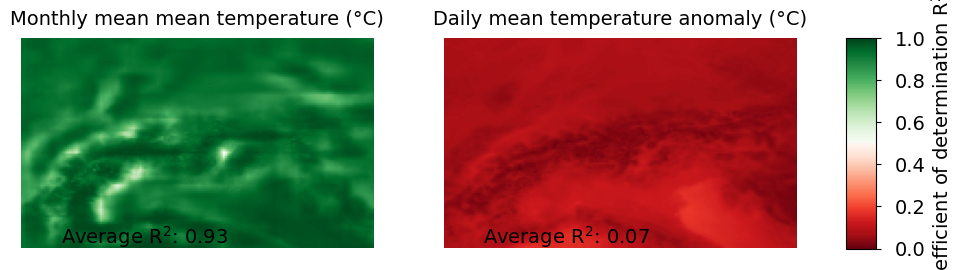

In [23]:
# define color map: red to green
grn = cm.get_cmap('Greens', 128)
red = cm.get_cmap('Reds_r', 128)
red2green = ListedColormap(np.vstack((red(np.linspace(0, 1, 128)),
                                      grn(np.linspace(0, 1, 128)))))

# plot coefficient of determination
vmin, vmax = 0, 1
fig, ax = plt.subplots(1, 2, figsize=(10, 10))

# monthly means
im0 = ax[0].imshow(r2[0, :], origin='lower', cmap=red2green, vmin=vmin, vmax=vmax)
ax[0].text(x=r2.shape[1] - 2, y=2, s='Average R$^2$: {:.2f}'.format(np.nanmean(r2[0, :])), fontsize=14, ha='right');
ax[0].set_axis_off()
ax[0].set_title('Monthly mean {} (°C)'.format(NAMES[PREDICTAND]), fontsize=14, pad=10);

# daily anomalies
im1 = ax[1].imshow(r2[1, :], origin='lower', cmap=red2green, vmin=vmin, vmax=vmax)
ax[1].text(x=r2.shape[1] - 2, y=2, s='Average R$^2$: {:.2f}'.format(np.nanmean(r2[1, :])), fontsize=14, ha='right');
ax[1].set_axis_off()
ax[1].set_title('Daily {} anomaly (°C)'.format(NAMES[PREDICTAND]), fontsize=14, pad=10);



# add colorbar 
cbar_ax_bias = fig.add_axes([ax[1].get_position().x1 + 0.05, ax[1].get_position().y0,
                             0.03, ax[1].get_position().y1 - ax[1].get_position().y0])
cbar_bias = fig.colorbar(im0, cax=cbar_ax_bias)
cbar_bias.set_label(label='Coefficient of determination R$^2$', fontsize=14)
cbar_bias.ax.tick_params(labelsize=14, pad=10)

# save figure
fig.savefig('/home/sdhinakaran/eurac/downScaleML/Notebooks/Thesis_Results/plots/{}_r2_spatial_sf.png'.format(PREDICTAND), dpi=300, bbox_inches='tight')

### Bias

Calculate yearly average bias over entire reference period:

In [24]:
# yearly average bias over reference period
y_pred_yearly_avg = y_pred.groupby('time.year').mean(dim='time')
y_true_yearly_avg = y_true.groupby('time.year').mean(dim='time')
bias_yearly_avg = y_pred_yearly_avg - y_true_yearly_avg
print('({}:{}) Yearly average bias of {}: {:.2f}°C'.format(TRUE, PRED, PREDICTAND, bias_yearly_avg.mean().item()))

(CERRA_tasmean:Downscaled SEAS5) Yearly average bias of tasmean: -1.49°C


In [25]:
# mean absolute error over reference period
mae_avg = np.abs(y_pred_yearly_avg - y_true_yearly_avg).mean()
print('({}:{}) Yearly average MAE of {}: {:.2f}°C'.format(TRUE, PRED, PREDICTAND, mae_avg.mean().item()))

(CERRA_tasmean:Downscaled SEAS5) Yearly average MAE of tasmean: 1.49°C


In [26]:
# root mean squared error over reference period
rmse_avg = np.sqrt(((y_pred_yearly_avg - y_true_yearly_avg) ** 2).mean())
print('({}:{}) Yearly average RMSE of {}: {:.2f}°C'.format(TRUE, PRED, PREDICTAND, rmse_avg.mean().item()))

(CERRA_tasmean:Downscaled SEAS5) Yearly average RMSE of tasmean: 1.64°C


In [27]:
# Pearson's correlation coefficient over reference period
correlations = []
for year in y_pred_yearly_avg.year:
    y_p = y_pred_yearly_avg.sel(year=year).values        
    y_t = y_true_yearly_avg.sel(year=year).values
    r, _ = stats.pearsonr(y_p[~np.isnan(y_p)], y_t[~np.isnan(y_t)])
    print('({:d}): {:.2f}'.format(year.item(), r))
    correlations.append(r)
print('Yearly average Pearson correlation coefficient for {}: {:.2f}'.format(PREDICTAND, np.asarray(r).mean()))

(2017): 0.99
(2018): 0.98
(2019): 0.99
(2020): 0.99
Yearly average Pearson correlation coefficient for tasmean: 0.99


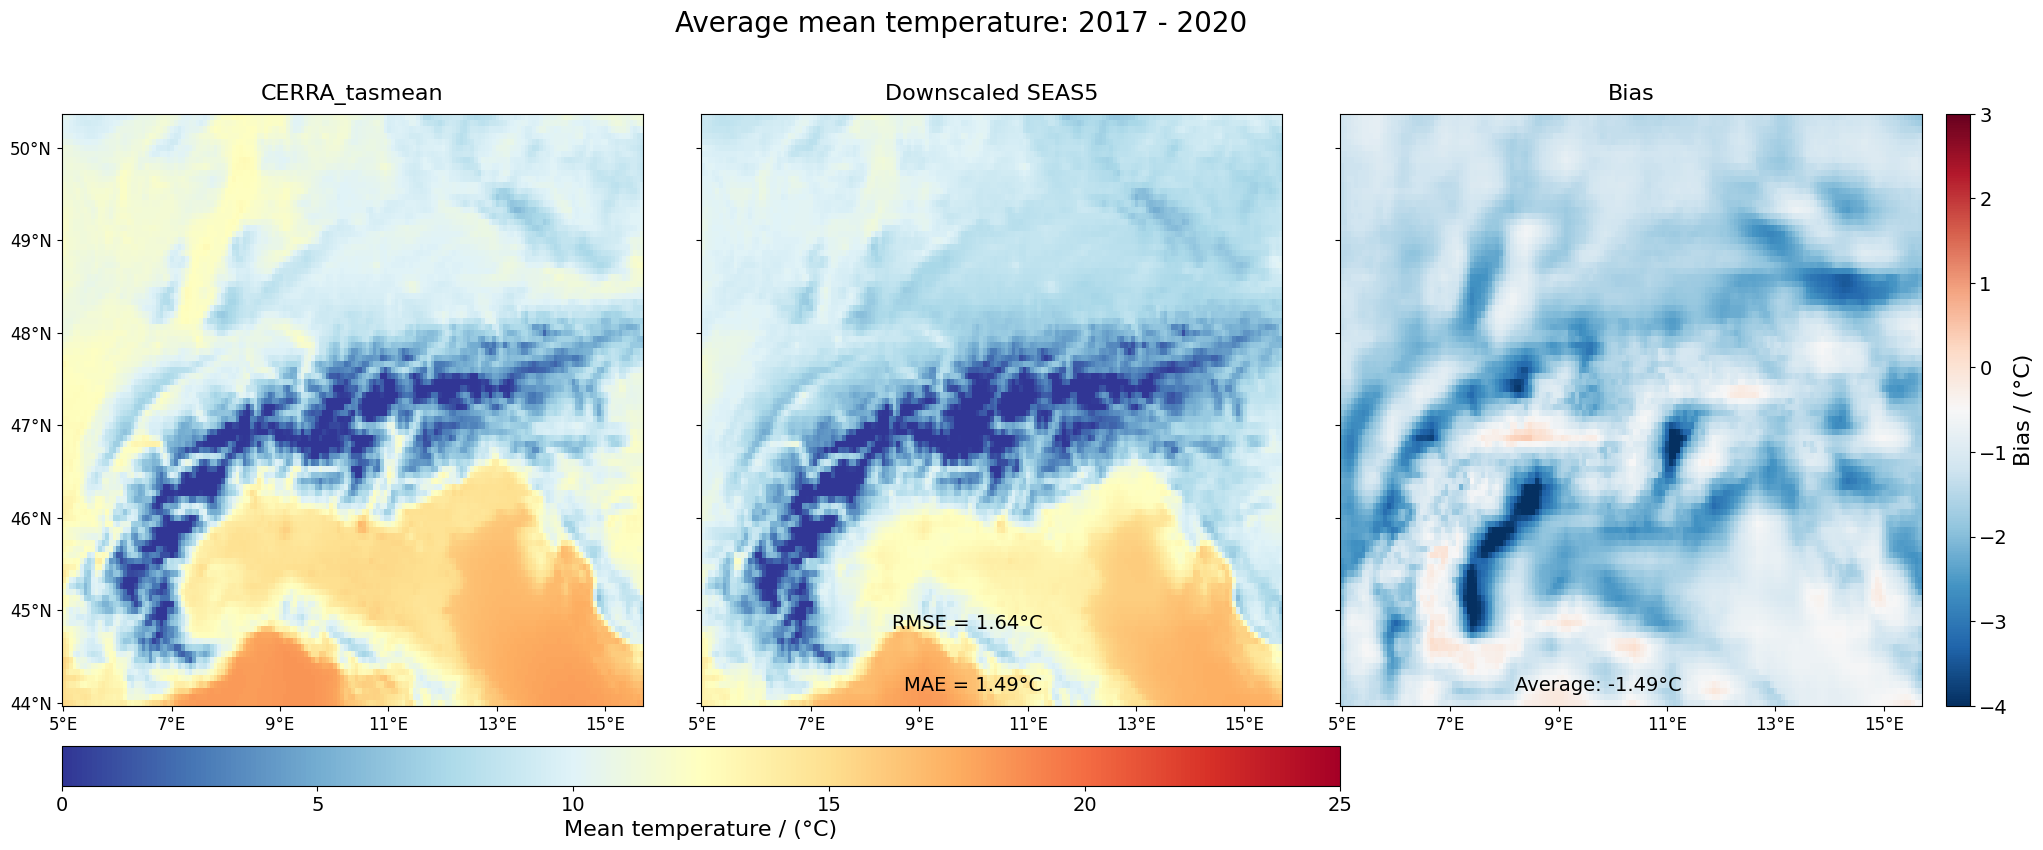

In [28]:
coord = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/base_models/RESULTS/tasmean/LGBMRegressor_tasmean_ztuvq_500_850_mslpt2m_dem_doy.nc")    

# plot average of observation, prediction, and bias
vmin, vmax = (-15, 15) if PREDICTAND == 'tasmin' else (0, 25)
fig, axes = plt.subplots(1, 3, figsize=(24, 8), sharex=True, sharey=True)
axes = axes.flatten()
for ds, ax in zip([y_true_yearly_avg, y_pred_yearly_avg, bias_yearly_avg], axes):
    if ds is bias_yearly_avg:
        ds = ds.mean(dim='year')
        im2 = ax.imshow(ds.values, origin='lower', cmap='RdBu_r', vmin=-4, vmax=3)
        ax.text(x=ds.shape[0] - 2, y=2, s='Average: {:.2f}°C'.format(ds.mean().item()), fontsize=14, ha='right')
    else:
        im1 = ax.imshow(ds.mean(dim='year').values, origin='lower', cmap='RdYlBu_r', vmin=vmin, vmax=vmax)
        
# set titles
axes[0].set_title(TRUE, fontsize=16, pad=10);
axes[1].set_title(PRED, fontsize=16, pad=10);
axes[2].set_title('Bias', fontsize=16, pad=10);

# adjust axes
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticks([])
    ax.axes.axis('tight')
    ax.set_xlabel('')
    ax.set_ylabel('')

# add latitude labels to left and right plots
lat_resolution = 15  # Specify the resolution in degrees
for ax in [axes[0], axes[-1]]:
    lat_values = coord.y.values
    lat_indices = [int(round(i)) for i in np.arange(0, len(lat_values), lat_resolution)]
    ax.set_yticks(lat_indices)
    ax.set_yticklabels(['{}°N'.format(int(round(lat_values[i]))) for i in lat_indices], fontsize=12)

# add longitude labels to all plots at the bottom
lon_resolution = 30  # Specify the resolution in degrees
for ax in axes:
    lon_values = coord.x.values
    lon_indices = [int(round(i)) for i in np.arange(0, len(lon_values), lon_resolution)]
    ax.set_xticks(lon_indices)
    ax.set_xticklabels(['{}°E'.format(int(round(lon_values[i]))) for i in lon_indices], fontsize=12)



# adjust figure
fig.suptitle('Average {}: {} - {}'.format(NAMES[PREDICTAND], start_year, end_year), fontsize=20);
fig.subplots_adjust(hspace=0, wspace=0.1, top=0.85)

# add colorbar for bias
axes = axes.flatten()
cbar_ax_bias = fig.add_axes([axes[-1].get_position().x1 + 0.01, axes[-1].get_position().y0,
                             0.01, axes[-1].get_position().y1 - axes[-1].get_position().y0])
cbar_bias = fig.colorbar(im2, cax=cbar_ax_bias)
cbar_bias.set_label(label='Bias / (°C)', fontsize=16)
cbar_bias.ax.tick_params(labelsize=14)

# add colorbar for predictand
cbar_ax_predictand = fig.add_axes([axes[0].get_position().x0, axes[0].get_position().y0 - 0.1,
                                   axes[-1].get_position().x0 - axes[0].get_position().x0,
                                   0.05])
cbar_predictand = fig.colorbar(im1, cax=cbar_ax_predictand, orientation='horizontal')
cbar_predictand.set_label(label='{} / (°C)'.format(NAMES[PREDICTAND].capitalize()), fontsize=16)
cbar_predictand.ax.tick_params(labelsize=14)

# add metrics: MAE and RMSE
axes[1].text(x=ds.shape[0] - 2, y=2, s='MAE = {:.2f}°C'.format(mae_avg.mean().item()), fontsize=14, ha='right')
axes[1].text(x=ds.shape[0] - 2, y=12, s='RMSE = {:.2f}°C'.format(rmse_avg.mean().item()), fontsize=14, ha='right')

# save figure
fig.savefig('/home/sdhinakaran/eurac/downScaleML/Notebooks/Thesis_Results/plots/{}_average_bias_sf.png'.format(PREDICTAND), dpi=300, bbox_inches='tight')

### Seasonal bias

Calculate seasonal bias:

In [29]:
# group data by season: (DJF, MAM, JJA, SON)
y_true_snl = y_true.groupby('time.season').mean(dim='time')
y_pred_snl = y_pred.groupby('time.season').mean(dim='time')
bias_snl = y_pred_snl - y_true_snl

In [30]:
# print average bias per season: Insitu:CERRA
for season in bias_snl.season:
    print('({}:{}) Average bias of mean {} for season {}: {:.1f}°C'.format(TRUE, PRED, PREDICTAND, season.item(), bias_snl.sel(season=season).mean().item()))

(CERRA_tasmean:Downscaled SEAS5) Average bias of mean tasmean for season DJF: -1.9°C
(CERRA_tasmean:Downscaled SEAS5) Average bias of mean tasmean for season JJA: -1.2°C
(CERRA_tasmean:Downscaled SEAS5) Average bias of mean tasmean for season MAM: -2.0°C
(CERRA_tasmean:Downscaled SEAS5) Average bias of mean tasmean for season SON: -0.9°C


Plot seasonal differences, taken from the [xarray documentation](xarray.pydata.org/en/stable/examples/monthly-means.html).

In [31]:
bias_snl

<xarray.DataArray 'tasmean' (season: 4, y: 96, x: 161)> Size: 495kB
array([[[-2.09151922, -2.11965801, -2.13645818, ..., -0.8434736 ,
         -1.07618787, -1.10055064],
        [-2.11744005, -2.18291887, -2.11556829, ..., -1.05997707,
         -1.34485321, -1.36199321],
        [-2.11165506, -2.00870826, -1.93877152, ..., -1.43082989,
         -1.65636026, -1.73336796],
        ...,
        [-1.56084472, -1.51349499, -1.45935009, ..., -1.9787748 ,
         -2.03507231, -2.09300611],
        [-1.58897639, -1.56592516, -1.51431311, ..., -2.34688902,
         -2.44968224, -2.48552532],
        [-1.61505219, -1.58294271, -1.55914992, ..., -2.61477713,
         -2.68838143, -2.707215  ]],

       [[-1.00840562, -0.72703235, -0.67209918, ...,  0.39745348,
          0.36807296,  0.23520598],
        [-0.92043896, -0.73025806, -0.59148566, ...,  0.21446606,
          0.15099513, -0.09413978],
        [-0.78897134, -0.83700652, -0.72940545, ..., -0.02758255,
         -0.20894023, -0.48053116],
...
        [-1.67630821, -1.6573934 , -1.59234814, ..., -1.82809098,
         -1.88683469, -1.94120485],
        [-1.70093931, -1.67721406, -1.63447499, ..., -2.01447038,
         -2.12313325, -2.1398303 ],
        [-1.74952155, -1.72520667, -1.68576018, ..., -2.21267728,
         -2.27878464, -2.31411859]],

       [[-1.08686475, -1.05318179, -1.04898138, ..., -0.4024587 ,
         -0.65687188, -0.70019941],
        [-1.00576492, -1.02732442, -0.99669232, ..., -0.50440596,
         -0.77378678, -0.76102544],
        [-0.95800951, -0.88450391, -0.85198526, ..., -0.77414234,
         -0.92728253, -0.99304161],
        ...,
        [-0.3816912 , -0.34613622, -0.2971934 , ..., -0.96803844,
         -0.94341815, -0.91198   ],
        [-0.33619337, -0.29617992, -0.27476188, ..., -0.93368612,
         -0.96163508, -0.96926118],
        [-0.33471237, -0.30833982, -0.29617592, ..., -0.97777862,
         -1.02392641, -1.06587834]]])
Coordinates:
  * y                  (y) float64 768B 43.62 43.69 43.75 ... 49.86 49.93 50.0
  * x                  (x) float64 1kB 5.084 5.151 5.218 ... 15.69 15.76 15.82
  * season             (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'
    heightAboveGround  float64 8B ...

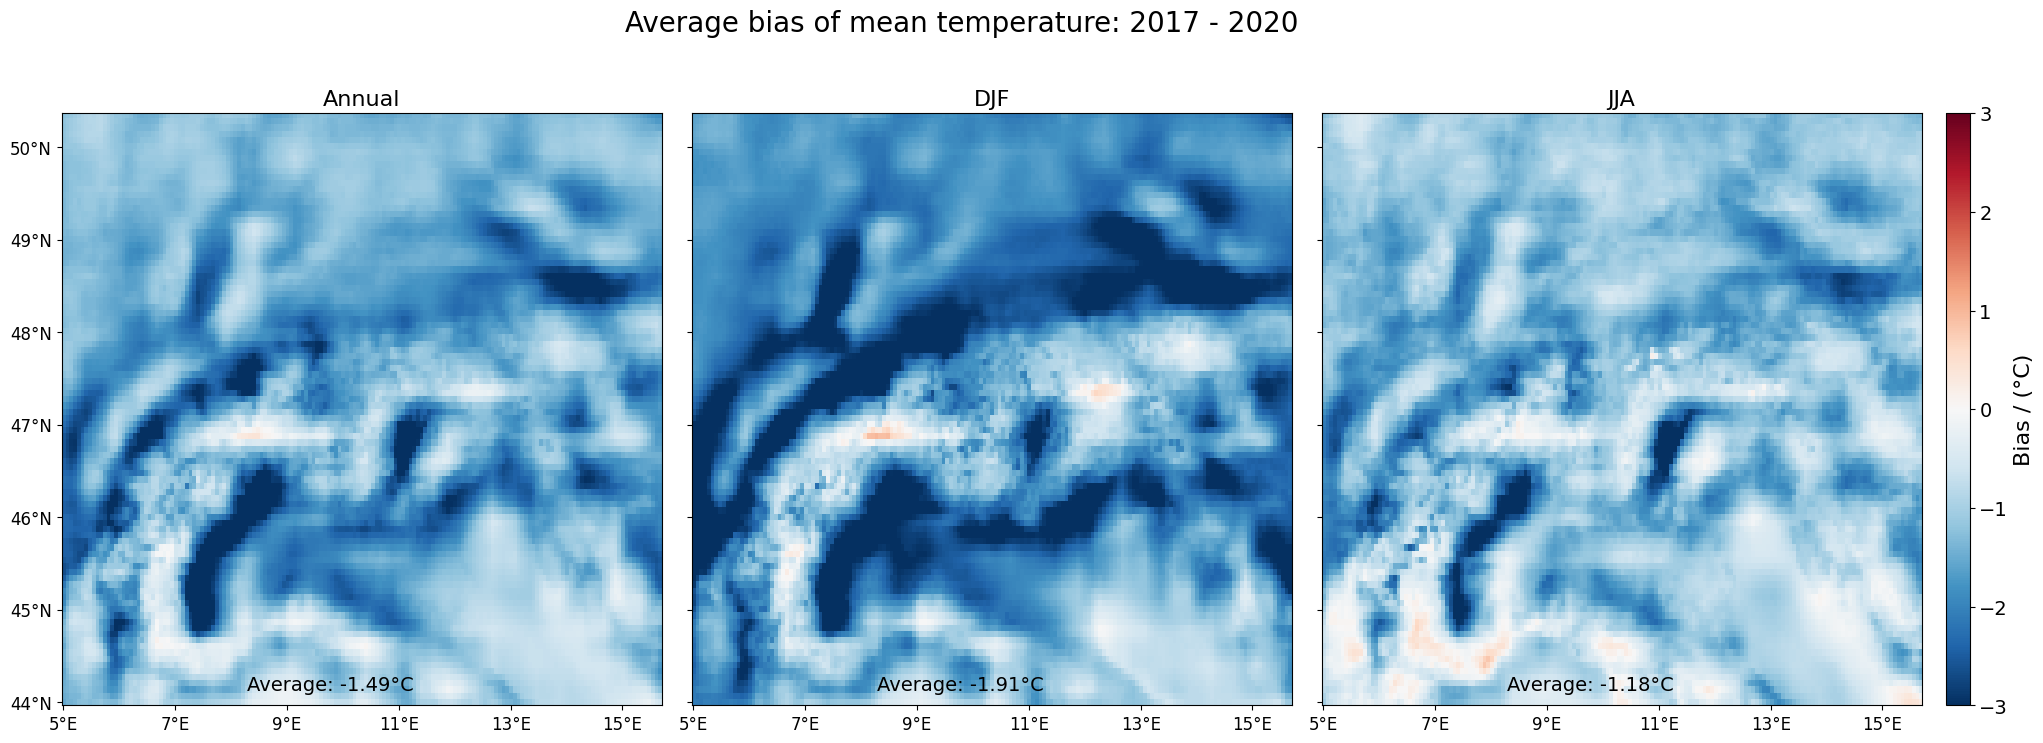

In [32]:
# plot seasonal differences
seasons = ('DJF', 'JJA')
fig, axes = plt.subplots(nrows=1, ncols=len(seasons) + 1, figsize=(24, 8), sharex=True, sharey=True)
axes = axes.flatten()


# plot annual average bias
ds = bias_yearly_avg.mean(dim='year')
im = axes[0].imshow(ds.values, origin='lower', cmap='RdBu_r', vmin=-3, vmax=3)
axes[0].set_title('Annual', fontsize=16);
axes[0].text(x=ds.shape[0] - 2, y=2, s='Average: {:.2f}°C'.format(ds.mean().item()), fontsize=14, ha='right')

# plot seasonal average bias
for ax, season in zip(axes[1:], seasons):
    ds = bias_snl.sel(season=season)
    ax.imshow(ds.values, origin='lower', cmap='RdBu_r', vmin=-3, vmax=3)
    ax.set_title(season, fontsize=16);
    ax.text(x=ds.shape[0] - 2, y=2, s='Average: {:.2f}°C'.format(ds.mean().item()), fontsize=14, ha='right')

# adjust axes
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticks([])
    ax.axes.axis('tight')
    ax.set_xlabel('')
    ax.set_ylabel('')

# add latitude labels to left and right plots
lat_resolution = 15  # Specify the resolution in degrees
for ax in [axes[0], axes[-1]]:
    lat_values = coord.y.values
    lat_indices = [int(round(i)) for i in np.arange(0, len(lat_values), lat_resolution)]
    ax.set_yticks(lat_indices)
    ax.set_yticklabels(['{}°N'.format(int(round(lat_values[i]))) for i in lat_indices], fontsize=12)

# add longitude labels to all plots at the bottom
lon_resolution = 30  # Specify the resolution in degrees
for ax in axes:
    lon_values = coord.x.values
    lon_indices = [int(round(i)) for i in np.arange(0, len(lon_values), lon_resolution)]
    ax.set_xticks(lon_indices)
    ax.set_xticklabels(['{}°E'.format(int(round(lon_values[i]))) for i in lon_indices], fontsize=12)


# adjust figure
fig.suptitle('Average bias of {}: {} - {}'.format(NAMES[PREDICTAND], start_year, end_year), fontsize=20);
fig.subplots_adjust(hspace=0, wspace=0.05, top=0.85)

# add colorbar
cbar_ax_predictand = fig.add_axes([axes[-1].get_position().x1 + 0.01, axes[-1].get_position().y0,
                                   0.01, axes[0].get_position().y1 - axes[-1].get_position().y0])
cbar_predictand = fig.colorbar(im, cax=cbar_ax_predictand)
cbar_predictand.set_label(label='Bias / (°C)', fontsize=16)
cbar_predictand.ax.tick_params(labelsize=14)

# save figure
fig.savefig('/home/sdhinakaran/eurac/downScaleML/Notebooks/Thesis_Results/plots/{}_bias_seasonal_sf.png'.format(PREDICTAND), dpi=300, bbox_inches='tight')

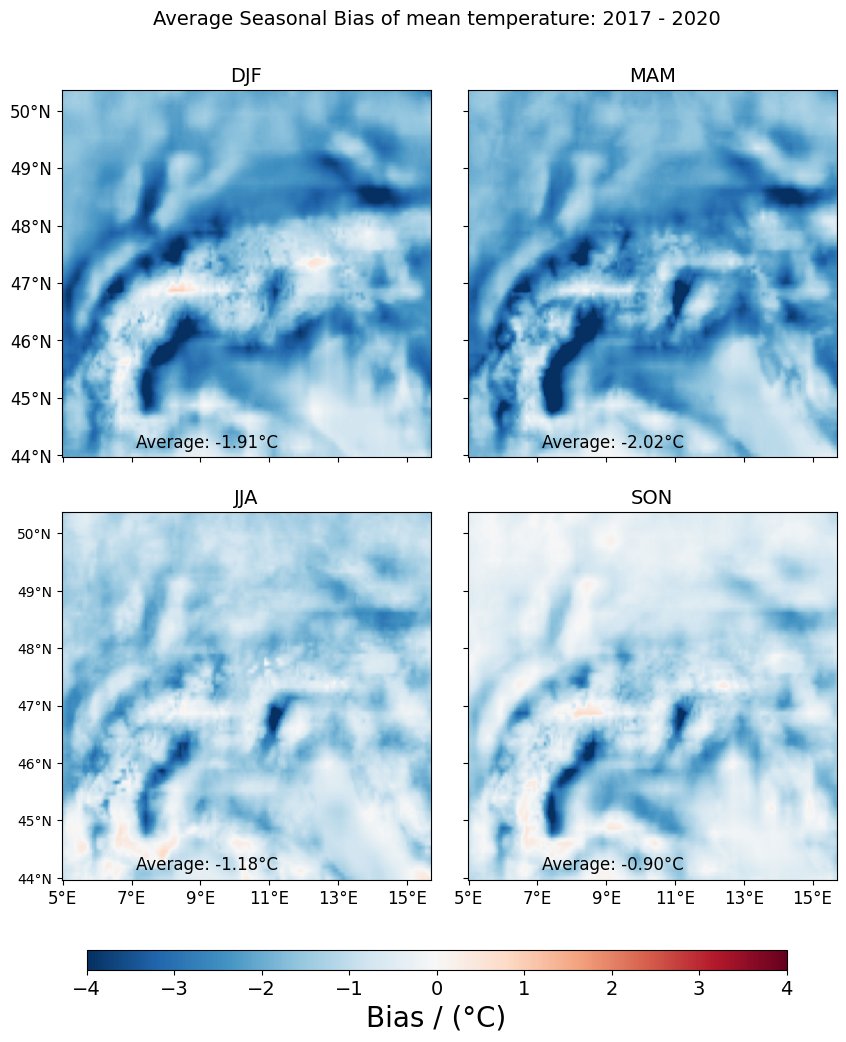

In [33]:
import matplotlib.pyplot as plt

# plot seasonal differences
seasons = ('DJF', 'MAM', 'JJA', 'SON')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=True, sharey=True)
axes = axes.flatten()

# plot seasonal average bias
for ax, season in zip(axes, seasons):
    ds = bias_snl.sel(season=season)
    im = ax.imshow(ds.values, origin='lower', cmap='RdBu_r', vmin=-4, vmax=4)
    ax.set_title(season, fontsize=14)
    ax.text(x=ds.shape[0] - 2, y=2, s='Average: {:.2f}°C'.format(ds.mean().item()), fontsize=12, ha='right')

# adjust axes
for ax in axes:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticks([])
    ax.axes.axis('tight')
    ax.set_xlabel('')
    ax.set_ylabel('')

# add latitude labels to left and right plots
lat_resolution = 15  # Specify the resolution in degrees
for ax in [axes[0], axes[-1]]:
    lat_values = coord.y.values
    lat_indices = [int(round(i)) for i in np.arange(0, len(lat_values), lat_resolution)]
    ax.set_yticks(lat_indices)
    ax.set_yticklabels(['{}°N'.format(int(round(lat_values[i]))) for i in lat_indices], fontsize=12)

# add longitude labels to all plots at the bottom
lon_resolution = 30  # Specify the resolution in degrees
for ax in axes:
    lon_values = coord.x.values
    lon_indices = [int(round(i)) for i in np.arange(0, len(lon_values), lon_resolution)]
    ax.set_xticks(lon_indices)
    ax.set_xticklabels(['{}°E'.format(int(round(lon_values[i]))) for i in lon_indices], fontsize=12)



# adjust figure
fig.suptitle('Average Seasonal Bias of {}: {} - {}'.format(NAMES[PREDICTAND], start_year, end_year), fontsize=14)
fig.subplots_adjust(hspace=0.15, wspace=0.1, top=0.9)

# add colorbar at the bottom
cbar_ax_predictand = fig.add_axes([0.15, 0.02, 0.7, 0.02])
cbar_predictand = fig.colorbar(im, cax=cbar_ax_predictand, orientation='horizontal')
cbar_predictand.set_label(label='Bias / (°C)', fontsize=20)
cbar_predictand.ax.tick_params(labelsize=14)

# save figure
fig.savefig('/home/sdhinakaran/eurac/downScaleML/Notebooks/Thesis_Results/plots/{}_bias_seasonal_sf.png'.format(PREDICTAND), dpi=300, bbox_inches='tight')

plt.show()


### Bias of extreme values

In [34]:
# extreme quantile of interest
quantile = 0.02 if PREDICTAND == 'tasmin' else 0.98

In [35]:
# calculate extreme quantile for each year
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=RuntimeWarning)
    y_pred_ex = y_pred.groupby('time.year').quantile(quantile, dim='time')
    y_true_ex = y_true.groupby('time.year').quantile(quantile, dim='time')

In [36]:
# calculate bias in extreme quantile for each year
bias_ex = y_pred_ex - y_true_ex

In [37]:
# bias of extreme quantile: Insitu:CERRA
print('({}:{}) Yearly average bias for P{:.0f} of {}: {:.1f}°C'.format(TRUE, PRED, quantile * 100, PREDICTAND, bias_ex.mean().item()))

(CERRA_tasmean:Downscaled SEAS5) Yearly average bias for P98 of tasmean: -3.6°C


In [38]:
# mean absolute error in extreme quantile
mae_ex = np.abs(y_pred_ex - y_true_ex).mean()

In [39]:
# mae of extreme quantile: Insitu:CERRA
print('({}:{}) Yearly average MAE for P{:.0f} of {}: {:.1f}°C'.format(TRUE, PRED, quantile * 100, PREDICTAND, mae_ex.item()))

(CERRA_tasmean:Downscaled SEAS5) Yearly average MAE for P98 of tasmean: 3.6°C


In [40]:
# root mean squared error in extreme quantile
rmse_ex = np.sqrt(((y_pred_ex - y_true_ex) ** 2).mean())

In [41]:
# rmse of extreme quantile: Insitu:CERRA
print('({}:{}) Yearly average RMSE for P{:.0f} of {}: {:.1f}°C'.format(TRUE, PRED, quantile * 100, PREDICTAND, rmse_ex.item()))

(CERRA_tasmean:Downscaled SEAS5) Yearly average RMSE for P98 of tasmean: 3.9°C


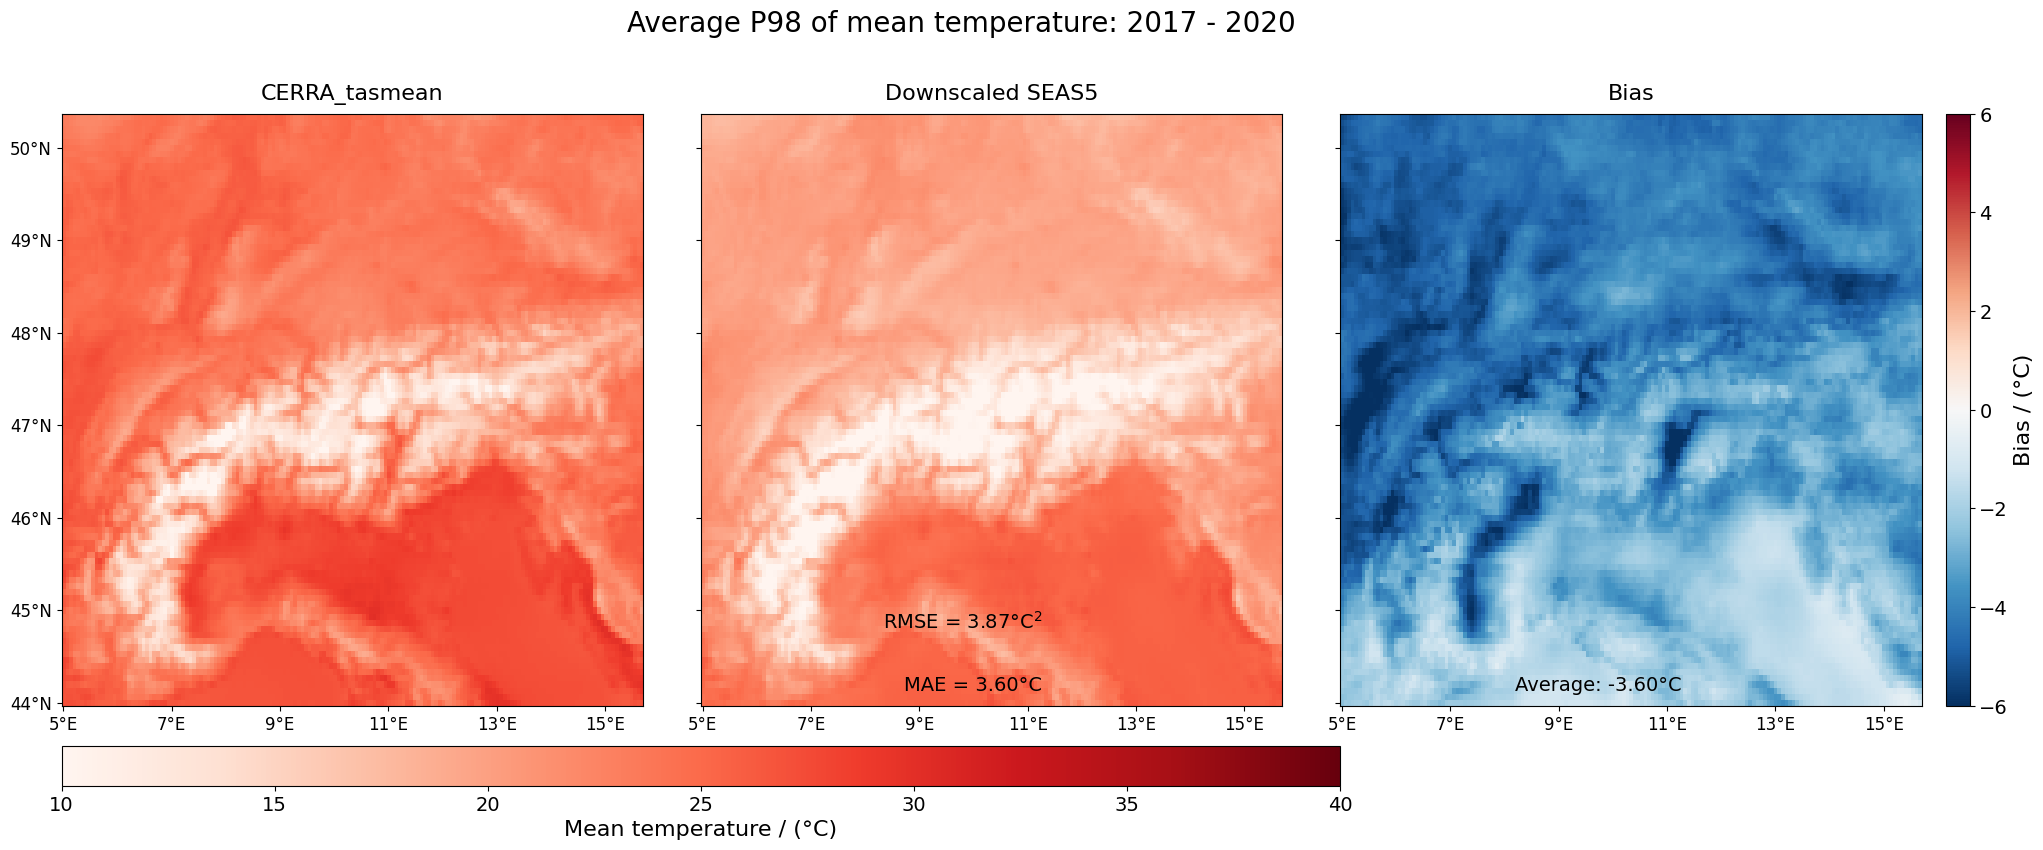

In [42]:
# plot extremes of observation, prediction, and bias
vmin, vmax = (-20, 0) if PREDICTAND == 'tasmin' else (10, 40)
fig, axes = plt.subplots(1, 3, figsize=(24, 8), sharex=True, sharey=True)
axes = axes.flatten()
for ds, ax in zip([y_true_ex, y_pred_ex, bias_ex], axes):
    if ds is bias_ex:
        ds = ds.mean(dim='year')
        im2 = ax.imshow(ds.values, origin='lower', cmap='RdBu_r', vmin=-6, vmax=6)
        ax.text(x=ds.shape[0] - 2, y=2, s='Average: {:.2f}°C'.format(ds.mean().item()), fontsize=14, ha='right')
    else:
        im1 = ax.imshow(ds.mean(dim='year').values, origin='lower', cmap='Blues_r' if PREDICTAND == 'tasmin' else 'Reds',
                        vmin=vmin, vmax=vmax)

# set titles
axes[0].set_title(TRUE, fontsize=16, pad=10);
axes[1].set_title(PRED, fontsize=16, pad=10);
axes[2].set_title('Bias', fontsize=16, pad=10);

# adjust axes
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticks([])
    ax.axes.axis('tight')
    ax.set_xlabel('')
    ax.set_ylabel('')

# add latitude labels to left and right plots
lat_resolution = 15  # Specify the resolution in degrees
for ax in [axes[0], axes[-1]]:
    lat_values = coord.y.values
    lat_indices = [int(round(i)) for i in np.arange(0, len(lat_values), lat_resolution)]
    ax.set_yticks(lat_indices)
    ax.set_yticklabels(['{}°N'.format(int(round(lat_values[i]))) for i in lat_indices], fontsize=12)

# add longitude labels to all plots at the bottom
lon_resolution = 30  # Specify the resolution in degrees
for ax in axes:
    lon_values = coord.x.values
    lon_indices = [int(round(i)) for i in np.arange(0, len(lon_values), lon_resolution)]
    ax.set_xticks(lon_indices)
    ax.set_xticklabels(['{}°E'.format(int(round(lon_values[i]))) for i in lon_indices], fontsize=12)


# adjust figure
fig.suptitle('Average P{:.0f} of {}: {} - {}'.format(quantile * 100, NAMES[PREDICTAND], start_year, end_year), fontsize=20);
fig.subplots_adjust(hspace=0, wspace=0.1, top=0.85)

# add colorbar for bias
axes = axes.flatten()
cbar_ax = fig.add_axes([axes[-1].get_position().x1 + 0.01, axes[-1].get_position().y0,
                        0.01, axes[-1].get_position().y1 - axes[-1].get_position().y0])
cbar = fig.colorbar(im2, cax=cbar_ax)
cbar.set_label(label='Bias / (°C)', fontsize=16)
cbar.ax.tick_params(labelsize=14)

# add colorbar for predictand
cbar_ax_predictand = fig.add_axes([axes[0].get_position().x0, axes[0].get_position().y0 - 0.1,
                                   axes[-1].get_position().x0 - axes[0].get_position().x0,
                                   0.05])
cbar_predictand = fig.colorbar(im1, cax=cbar_ax_predictand, orientation='horizontal')
cbar_predictand.set_label(label='{} / (°C)'.format(NAMES[PREDICTAND].capitalize()), fontsize=16)
cbar_predictand.ax.tick_params(labelsize=14)

# add metrics: MAE and RMSE
axes[1].text(x=ds.shape[0] - 2, y=2, s='MAE = {:.2f}°C'.format(mae_ex.item()), fontsize=14, ha='right')
axes[1].text(x=ds.shape[0] - 2, y=12, s='RMSE = {:.2f}°C$^2$'.format(rmse_ex.item()), fontsize=14, ha='right')

# save figure
fig.savefig('/home/sdhinakaran/eurac/downScaleML/Notebooks/Thesis_Results/plots/{}_bias_p{:.0f}_sf.png'.format(PREDICTAND, quantile * 100), dpi=300, bbox_inches='tight')

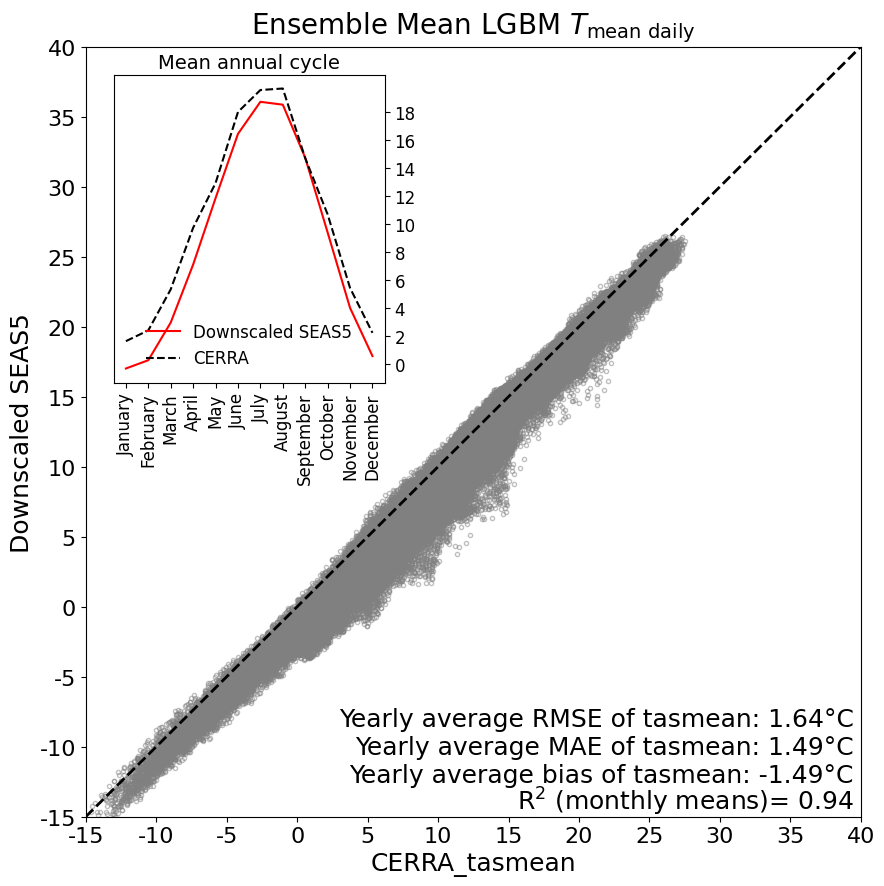

In [48]:
# scatter plot of observations vs. predictions
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# plot entire dataset
ax.plot(y_true_mv, y_pred_mv, 'o', alpha=.5, markeredgecolor='grey', markerfacecolor='none', markersize=3)

# plot 1:1 mapping line
if PREDICTAND == 'tasmin':
    interval = np.arange(-25, 30, 5)
else:
    interval = np.arange(-15, 45, 5)

ax.plot(interval, interval, color='k', lw=2, ls='--')

# add coefficients of determination
ax.text(interval[-1] - 0.5, interval[0] + 0.5, s='R$^2$ (monthly means)= {:.2f}'.format(r2_mm), ha='right', fontsize=18)
#ax.text(interval[-1] - 0.5, interval[0] + 2.5, s='R$^2$ (daily anomalies) = {:.2f}'.format(r2_anom), ha='right', fontsize=18)
ax.text(interval[-1] - 0.5, interval[0] + 2.5, s='Yearly average bias of {}: {:.2f}°C'.format(PREDICTAND, bias_yearly_avg.mean().item()), ha='right', fontsize=18)
ax.text(interval[-1] - 0.5, interval[0] + 4.5, s='Yearly average MAE of {}: {:.2f}°C'.format(PREDICTAND, mae_avg.mean().item()), ha='right', fontsize=18)
ax.text(interval[-1] - 0.5, interval[0] + 6.5, s='Yearly average RMSE of {}: {:.2f}°C'.format(PREDICTAND, rmse_avg.mean().item()), ha='right', fontsize=18)


# format axes
ax.set_ylim(interval[0], interval[-1])
ax.set_xlim(interval[0], interval[-1])
ax.set_xticks(interval)
ax.set_xticklabels(interval, fontsize=16)
ax.set_yticks(interval)
ax.set_yticklabels(interval, fontsize=16)
ax.set_xlabel('CERRA_tasmean', fontsize=18)
ax.set_ylabel(PRED, fontsize=18)
ax.set_title('Ensemble Mean {}'.format(str("LGBM $T_{\mathrm{mean \ daily}}$")), fontsize=20, pad=10);

# add axis for annual cycle
axins = inset_axes(ax, width="35%", height="40%", loc=2, borderpad=2)
axins.plot(y_pred_ac.values, ls='-', color='r', label=PRED)
axins.plot(y_true_ac.values, ls='--', color='k', label='CERRA')
axins.legend(frameon=False, fontsize=12, loc='lower center');
axins.yaxis.tick_right()
axins.set_yticks(np.arange(-10, 11, 2) if PREDICTAND == 'tasmin' else np.arange(0, 20, 2))
axins.set_yticklabels(np.arange(-10, 11, 2) if PREDICTAND == 'tasmin' else np.arange(0, 20, 2), fontsize=12)
axins.set_xticks(np.arange(0, 12))
axins.set_xticklabels([calendar.month_name[i + 1] for i in np.arange(0, 12)], rotation=90, fontsize=12)
axins.set_title('Mean annual cycle', fontsize=14, pad=5);

plt.savefig('/home/sdhinakaran/eurac/downScaleML/Notebooks/Thesis_Results/plots/Annual_cycle_sf.png', dpi=300, bbox_inches='tight')


In [44]:
-

SyntaxError: invalid syntax (476313318.py, line 1)

In [49]:
# define the predictand
PREDICTAND = 'tasmean'  # 'tasmin' or 'tasmax' or 'tasmean'
year = 2016

In [50]:
# mapping from predictands to variable names
NAMES = {'tasmin': 'minimum temperature', 'tasmax': 'maximum temperature', 'tasmean': 'mean temperature'}
# dataset names mapping
PRED = 'Downscaled SEAS5'
TRUE = f'CERRA_{PREDICTAND}'

### Imports

In [51]:
# builtins
import datetime
import warnings
import calendar

# externals
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy.stats as stats
from IPython.display import Image
from sklearn.metrics import r2_score

### Load datasets

In [52]:
if year == 2016:

    if PREDICTAND == 'tasmin':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/thesis_output/RESULTS/tasmin/LGBMRegressor_tasmin_ztuvq_500_850_mslpt2m_0mm_dem_doy_2016.nc")
        
    if PREDICTAND == 'tasmax':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/thesis_output/RESULTS/tasmax/LGBMRegressor_tasmax_ztuvq_500_850_mslpt2m_0mm_dem_doy_2016.nc")
        
    if PREDICTAND == 'tasmean':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/sf_downscaling/RESULTS/tasmean/LGBMRegressor_tasmean_ztuvq_500_850_mslpt2m_0mm_dem_doy_hindcast.nc")    

else:
    if PREDICTAND == 'tasmin':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/thesis_output/RESULTS/tasmin/LGBMRegressor_tasmin_ztuvq_500_850_mslpt2m_0mm_dem_doy_2020.nc")
        
    if PREDICTAND == 'tasmax':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/thesis_output/RESULTS/tasmax/LGBMRegressor_tasmax_ztuvq_500_850_mslpt2m_0mm_dem_doy_2020.nc")
        
    if PREDICTAND == 'tasmean':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/sf_downscaling/RESULTS/tasmean/LGBMRegressor_tasmean_ztuvq_500_850_mslpt2m_0mm_dem_doy_forecast.nc")    

y_pred

<xarray.Dataset> Size: 1GB
Dimensions:  (time: 366, number: 25, y: 96, x: 161)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2016-02-01 2016-02-02 ... 2017-01-31
  * number   (number) int64 200B 0 1 2 3 4 5 6 7 8 ... 17 18 19 20 21 22 23 24
  * y        (y) float64 768B 43.62 43.69 43.75 43.82 ... 49.8 49.86 49.93 50.0
  * x        (x) float64 1kB 5.084 5.151 5.218 5.285 ... 15.62 15.69 15.76 15.82
Data variables:
    tasmean  (time, y, x, number) float64 1GB ...

In [53]:
y_pred = y_pred - 273.15

In [54]:
# CERRA Data
if PREDICTAND == 'tasmin':
    y_true = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/hydroModelDownscale/CERRA/tasmin/CERRA_2m_tasmin_1985_2020.nc")
    
if PREDICTAND == 'tasmax':
    y_true = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/hydroModelDownscale/CERRA/tasmax/CERRA_2m_tasmax_1985_2020.nc")
    
if PREDICTAND == 'tasmean':
    y_true = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/hydroModelDownscale/CERRA/tasmean/CERRA_2m_temperature_1985_2020.nc")    


y_true

y_true = y_true.rename({'lon': "x"})
y_true = y_true.rename({'lat': "y"})
y_true

<xarray.Dataset> Size: 813MB
Dimensions:            (x: 161, y: 96, time: 13149)
Coordinates:
  * x                  (x) float64 1kB 5.084 5.151 5.218 ... 15.69 15.76 15.82
  * y                  (y) float64 768B 43.62 43.69 43.75 ... 49.86 49.93 50.0
    heightAboveGround  float64 8B ...
  * time               (time) datetime64[ns] 105kB 1985-01-01 ... 2020-12-31
Data variables:
    t2m                (time, y, x) float32 813MB ...
Attributes:
    CDI:                     Climate Data Interface version 2.0.4 (https://mp...
    Conventions:             CF-1.7
    institution:             Norrkoping
    GRIB_centre:             eswi
    GRIB_centreDescription:  Norrkoping
    history:                 Fri Dec 08 06:52:58 2023: cdo remapbil,/mnt/CEPH...
    CDO:                     Climate Data Operators version 2.0.4 (https://mp...

In [55]:
# subset to time period covered by predictions
y_true = y_true.sel(time=y_pred.time)
y_true = y_true.rename({'t2m': PREDICTAND})
y_true = y_true - 273.15

# Spatially Aggregated Time Series of 2m-temperature variables

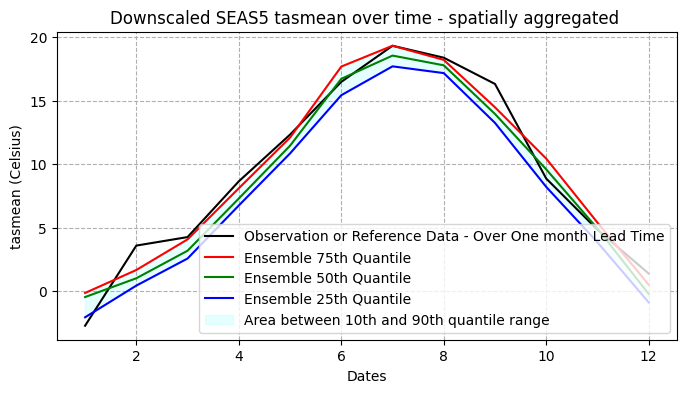

In [56]:
import numpy

weights = np.cos(np.deg2rad(y_pred.y))
weights.name = "weights"
ds_weighted = y_pred.weighted(weights)

data = ds_weighted.mean(dim=["y", "x"])
#SEAS5 Forecast Data Spatial Aggregation
#data = y_pred.mean(['y', 'x'])

data = data[list(data.data_vars)[0]]
data
variable = list(y_pred.data_vars)[0]
data = data.groupby('time.month').mean(keep_attrs=True)


#CERRA Reanalysis Data Spatial Aggregation
ref = y_true.mean(['y', 'x'])
ref = ref[list(ref.data_vars)[0]]
ref = ref.groupby('time.month').mean(keep_attrs=True)

ref


#Picking the Quantile for the Ensemble Members
data_90 = data.quantile(0.75, dim='number')
data_10 = data.quantile(0.25, dim='number')
data_50 = data.quantile(0.5, dim='number')

fig, ax = plt.subplots(1, 1, figsize = (8, 4))

colours = ['black','red','green','blue', 'cyan']
ax.plot(ref.month, ref[:], color=f'{colours[0]}', label=f'Observation or Reference Data - Over One month Lead Time')
ax.plot(data_90.month, data_90[:], color=f'{colours[1]}', label=f'Ensemble 75th Quantile')
ax.plot(data_50.month, data_50[:], color=f'{colours[2]}', label=f'Ensemble 50th Quantile')
ax.plot(data_10.month, data_10[:], color=f'{colours[3]}', label=f'Ensemble 25th Quantile')
ax.fill_between(ref.month, data_90[:], data_10[:], alpha=0.1, color=f'{colours[4]}', label=f'Area between 10th and 90th quantile range')

#ax.set_xlim(2020-01-01,2020-12-31)
ax.set_title(f'Downscaled SEAS5 {variable} over time - spatially aggregated ')
ax.set_ylabel(f'{variable} (Celsius)')
ax.set_xlabel('Dates')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.grid(linestyle='--')

fig.savefig(f'/home/sdhinakaran/eurac/downScaleML/Notebooks/Thesis_Results/plots/SEAS5_annual_{variable}_sf.png')

In [57]:
import xskillscore as xs



In [58]:
y_pred

<xarray.Dataset> Size: 1GB
Dimensions:  (time: 366, number: 25, y: 96, x: 161)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2016-02-01 2016-02-02 ... 2017-01-31
  * number   (number) int64 200B 0 1 2 3 4 5 6 7 8 ... 17 18 19 20 21 22 23 24
  * y        (y) float64 768B 43.62 43.69 43.75 43.82 ... 49.8 49.86 49.93 50.0
  * x        (x) float64 1kB 5.084 5.151 5.218 5.285 ... 15.62 15.69 15.76 15.82
Data variables:
    tasmean  (time, y, x, number) float64 1GB 5.292 7.889 2.468 ... 3.79 4.118

In [59]:
y_true

<xarray.Dataset> Size: 23MB
Dimensions:            (x: 161, y: 96, time: 366)
Coordinates:
  * x                  (x) float64 1kB 5.084 5.151 5.218 ... 15.69 15.76 15.82
  * y                  (y) float64 768B 43.62 43.69 43.75 ... 49.86 49.93 50.0
    heightAboveGround  float64 8B ...
  * time               (time) datetime64[ns] 3kB 2016-02-01 ... 2017-01-31
Data variables:
    tasmean            (time, y, x) float32 23MB 13.33 13.16 ... -3.534 -3.587
Attributes:
    CDI:                     Climate Data Interface version 2.0.4 (https://mp...
    Conventions:             CF-1.7
    institution:             Norrkoping
    GRIB_centre:             eswi
    GRIB_centreDescription:  Norrkoping
    history:                 Fri Dec 08 06:52:58 2023: cdo remapbil,/mnt/CEPH...
    CDO:                     Climate Data Operators version 2.0.4 (https://mp...

In [60]:
ds = xs.crps_ensemble(y_true, y_pred, dim = ['time'], member_dim = 'number')

/tmp/ipykernel_204412/2964363251.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection=ccrs.PlateCarree())


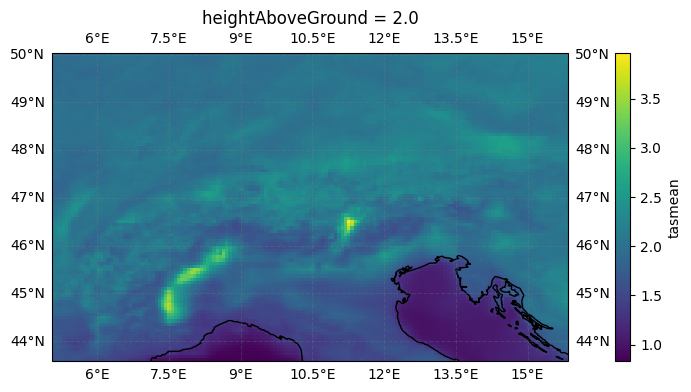

In [61]:
import cartopy.crs as ccrs

fig, ax = plt.subplots(1, 1, figsize = (12, 4))

ax = plt.subplot(projection=ccrs.PlateCarree())
ds.tasmean.plot.pcolormesh(x="x", y="y", ax=ax)
ax.coastlines()
# Create custom linestyle and color for gridlines
linestyle = '--'  # Double dashes for dotted lines
color = 'gray'     # Adjust transparency with alpha value (0: fully transparent, 1: opaque)
alpha = 0.25        # Set desired transparency level (between 0 and 1)

# Set gridlines properties
ax.gridlines(draw_labels=True, linestyle=linestyle, color=color, alpha=alpha)
plt.show()

In [62]:
ds1 = xs.crps_ensemble(y_true, y_pred, dim = ['x', 'y'], member_dim = 'number')

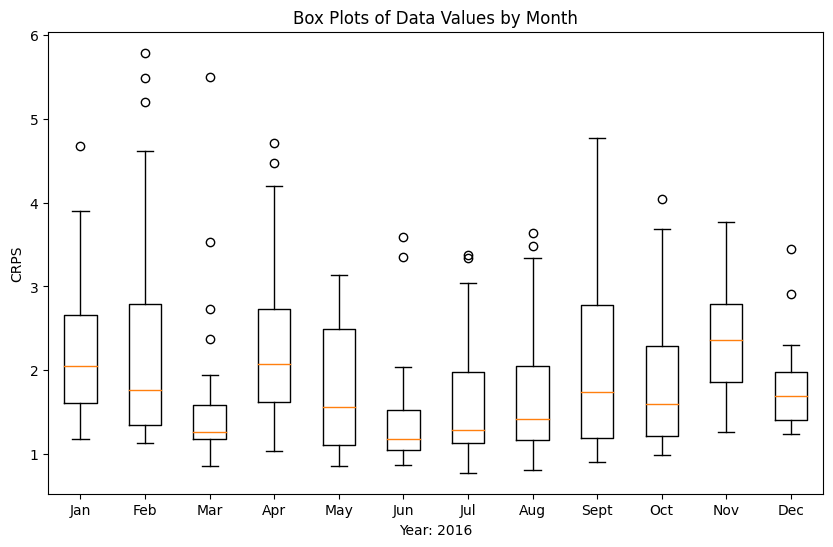

In [63]:
import matplotlib.pyplot as plt
import xarray as xr

# Get the month labels
month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]

grouped = ds1.tasmean.groupby('time.month')

monthly_values = []
for month, group in grouped:
    monthly_values.append(group.values)
# Create a box plot for each month
plt.figure(figsize=(10, 6))
plt.boxplot(monthly_values, labels=month_labels)
plt.xlabel('Month')
plt.ylabel('CRPS')
plt.xlabel(f"Year: {year}")
plt.title('Box Plots of Data Values by Month')
plt.grid(False)
plt.show()

Spread to Error Ratio

In [64]:
squared_diff = (y_true - y_pred)**2
mean_squared_diff = squared_diff.mean(dim="time")
rmse = np.sqrt(mean_squared_diff)
rmse = rmse.mean(dim="number")

std = y_pred.std(dim="number")
std = std.mean(dim="time")

spr = std / rmse

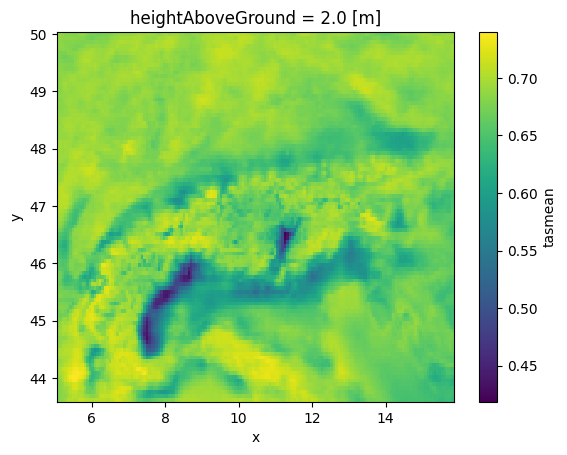

In [65]:
spr.tasmean.plot()

Ranked Probability Score

In [66]:
import xskillscore as xs

category_edges = np.array([.33, .66])
RPS = xs.rps(y_true, y_pred, category_edges, dim='time', member_dim='number')

In [67]:
RPS

<xarray.Dataset> Size: 126kB
Dimensions:                     (y: 96, x: 161)
Coordinates:
  * y                           (y) float64 768B 43.62 43.69 ... 49.93 50.0
  * x                           (x) float64 1kB 5.084 5.151 ... 15.76 15.82
    heightAboveGround           float64 8B 2.0
    observations_category_edge  <U45 180B '[-np.inf, 0.33), [0.33, 0.66), [0....
    forecasts_category_edge     <U45 180B '[-np.inf, 0.33), [0.33, 0.66), [0....
Data variables:
    tasmean                     (y, x) float64 124kB 0.02156 0.02861 ... 0.1452

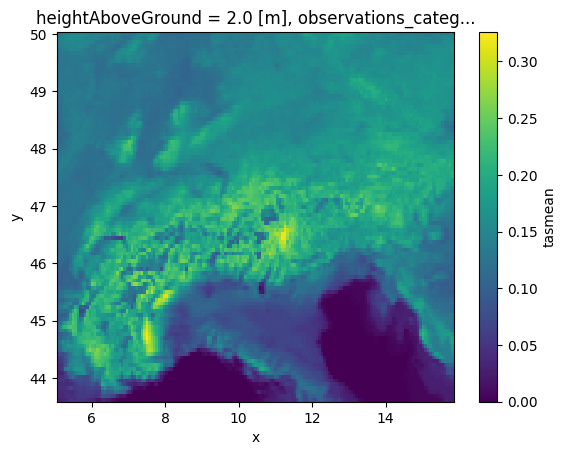

In [68]:
RPS.tasmean.plot()

In [69]:
# define the predictand
PREDICTAND = 'tasmean'  # 'tasmin' or 'tasmax' or 'tasmean'
year = 2020

In [70]:
# mapping from predictands to variable names
NAMES = {'tasmin': 'minimum temperature', 'tasmax': 'maximum temperature', 'tasmean': 'mean temperature'}
# dataset names mapping
PRED = 'Downscaled SEAS5'
TRUE = f'CERRA_{PREDICTAND}'

### Imports

In [71]:
# builtins
import datetime
import warnings
import calendar

# externals
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy.stats as stats
from IPython.display import Image
from sklearn.metrics import r2_score

### Load datasets

In [72]:
year = 2020
if year == 2016:

    if PREDICTAND == 'tasmin':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/thesis_output/RESULTS/tasmin/LGBMRegressor_tasmin_ztuvq_500_850_mslpt2m_0mm_dem_doy_2016.nc")
        
    if PREDICTAND == 'tasmax':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/thesis_output/RESULTS/tasmax/LGBMRegressor_tasmax_ztuvq_500_850_mslpt2m_0mm_dem_doy_2016.nc")
        
    if PREDICTAND == 'tasmean':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/sf_downscaling/RESULTS/tasmean/LGBMRegressor_tasmean_ztuvq_500_850_mslpt2m_0mm_dem_doy_hindcast.nc")    

else:
    if PREDICTAND == 'tasmin':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/thesis_output/RESULTS/tasmin/LGBMRegressor_tasmin_ztuvq_500_850_mslpt2m_0mm_dem_doy_2020.nc")
        
    if PREDICTAND == 'tasmax':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/thesis_output/RESULTS/tasmax/LGBMRegressor_tasmax_ztuvq_500_850_mslpt2m_0mm_dem_doy_2020.nc")
        
    if PREDICTAND == 'tasmean':
        y_pred = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/sf_downscaling/RESULTS/tasmean/LGBMRegressor_tasmean_ztuvq_500_850_mslpt2m_0mm_dem_doy_forecast.nc")    

    #y_pred = y_pred.rename({'member': "number"})


In [73]:
y_pred = y_pred - 273.15

In [74]:
# CERRA Data
if PREDICTAND == 'tasmin':
    y_true = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/hydroModelDownscale/CERRA/tasmin/CERRA_2m_tasmin_1985_2020.nc")
    
if PREDICTAND == 'tasmax':
    y_true = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/hydroModelDownscale/CERRA/tasmax/CERRA_2m_tasmax_1985_2020.nc")
    
if PREDICTAND == 'tasmean':
    y_true = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/hydroModelDownscale/CERRA/tasmean/CERRA_2m_temperature_1985_2020.nc")    


y_true

y_true = y_true.rename({'lon': "x"})
y_true = y_true.rename({'lat': "y"})
y_true

coord = xr.open_dataset("/mnt/CEPH_PROJECTS/InterTwin/Climate_Downscaling/base_models/RESULTS/tasmean/LGBMRegressor_tasmean_ztuvq_500_850_mslpt2m_dem_doy.nc")    


In [75]:
# subset to time period covered by predictions
y_true = y_true.sel(time=y_pred.time)
y_true = y_true.rename({'t2m': PREDICTAND})
y_true = y_true - 273.15

In [76]:
y_true

<xarray.Dataset> Size: 88MB
Dimensions:            (x: 161, y: 96, time: 1429)
Coordinates:
  * x                  (x) float64 1kB 5.084 5.151 5.218 ... 15.69 15.76 15.82
  * y                  (y) float64 768B 43.62 43.69 43.75 ... 49.86 49.93 50.0
    heightAboveGround  float64 8B ...
  * time               (time) datetime64[ns] 11kB 2017-02-01 ... 2020-12-30
Data variables:
    tasmean            (time, y, x) float32 88MB 12.01 11.92 ... 0.7253 0.5572
Attributes:
    CDI:                     Climate Data Interface version 2.0.4 (https://mp...
    Conventions:             CF-1.7
    institution:             Norrkoping
    GRIB_centre:             eswi
    GRIB_centreDescription:  Norrkoping
    history:                 Fri Dec 08 06:52:58 2023: cdo remapbil,/mnt/CEPH...
    CDO:                     Climate Data Operators version 2.0.4 (https://mp...

In [77]:
y_pred

<xarray.Dataset> Size: 9GB
Dimensions:  (time: 1429, y: 96, x: 161, member: 51)
Coordinates:
  * time     (time) datetime64[ns] 11kB 2017-02-01 2017-02-02 ... 2020-12-30
  * y        (y) float64 768B 43.62 43.69 43.75 43.82 ... 49.8 49.86 49.93 50.0
  * x        (x) float64 1kB 5.084 5.151 5.218 5.285 ... 15.62 15.69 15.76 15.82
  * member   (member) int64 408B 0 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
Data variables:
    tasmean  (member, time, y, x) float64 9GB 6.854 5.888 ... -8.355 -8.245

In [78]:
y_true

<xarray.Dataset> Size: 88MB
Dimensions:            (x: 161, y: 96, time: 1429)
Coordinates:
  * x                  (x) float64 1kB 5.084 5.151 5.218 ... 15.69 15.76 15.82
  * y                  (y) float64 768B 43.62 43.69 43.75 ... 49.86 49.93 50.0
    heightAboveGround  float64 8B ...
  * time               (time) datetime64[ns] 11kB 2017-02-01 ... 2020-12-30
Data variables:
    tasmean            (time, y, x) float32 88MB 12.01 11.92 ... 0.7253 0.5572
Attributes:
    CDI:                     Climate Data Interface version 2.0.4 (https://mp...
    Conventions:             CF-1.7
    institution:             Norrkoping
    GRIB_centre:             eswi
    GRIB_centreDescription:  Norrkoping
    history:                 Fri Dec 08 06:52:58 2023: cdo remapbil,/mnt/CEPH...
    CDO:                     Climate Data Operators version 2.0.4 (https://mp...

In [79]:
import numpy as np
import xarray as xr
import xskillscore as xs
import matplotlib.pyplot as plt

crps_ensemble = xs.crps_ensemble(y_true, y_pred, dim=[])


In [80]:
crps_ensemble

<xarray.Dataset> Size: 177MB
Dimensions:            (time: 1429, y: 96, x: 161)
Coordinates:
    heightAboveGround  float64 8B ...
  * x                  (x) float64 1kB 5.084 5.151 5.218 ... 15.69 15.76 15.82
  * y                  (y) float64 768B 43.62 43.69 43.75 ... 49.86 49.93 50.0
  * time               (time) datetime64[ns] 11kB 2017-02-01 ... 2020-12-30
Data variables:
    tasmean            (time, y, x) float64 177MB 5.094 5.535 ... 1.677 1.627

In [81]:
#rank_histogram = xs.rank_histogram(y_true, y_pred)


In [82]:
crps_ensemble

<xarray.Dataset> Size: 177MB
Dimensions:            (time: 1429, y: 96, x: 161)
Coordinates:
    heightAboveGround  float64 8B ...
  * x                  (x) float64 1kB 5.084 5.151 5.218 ... 15.69 15.76 15.82
  * y                  (y) float64 768B 43.62 43.69 43.75 ... 49.86 49.93 50.0
  * time               (time) datetime64[ns] 11kB 2017-02-01 ... 2020-12-30
Data variables:
    tasmean            (time, y, x) float64 177MB 5.094 5.535 ... 1.677 1.627

In [83]:
import matplotlib.pyplot as plt

bias_snl = crps_ensemble.groupby('time.season').mean(dim='time')
bias_snl = bias_snl.drop_vars("heightAboveGround")
bias_snl = bias_snl.tasmean

In [84]:
# print average bias per season: Insitu:CERRA
for season in bias_snl.season:
    print('({}:{}) Average bias of mean {} for season {}: {:.1f}°C'.format(TRUE, PRED, PREDICTAND, season.item(), bias_snl.sel(season=season).mean().item()))



(CERRA_tasmean:Downscaled SEAS5) Average bias of mean tasmean for season DJF: 2.2°C
(CERRA_tasmean:Downscaled SEAS5) Average bias of mean tasmean for season JJA: 1.8°C
(CERRA_tasmean:Downscaled SEAS5) Average bias of mean tasmean for season MAM: 2.3°C
(CERRA_tasmean:Downscaled SEAS5) Average bias of mean tasmean for season SON: 1.8°C


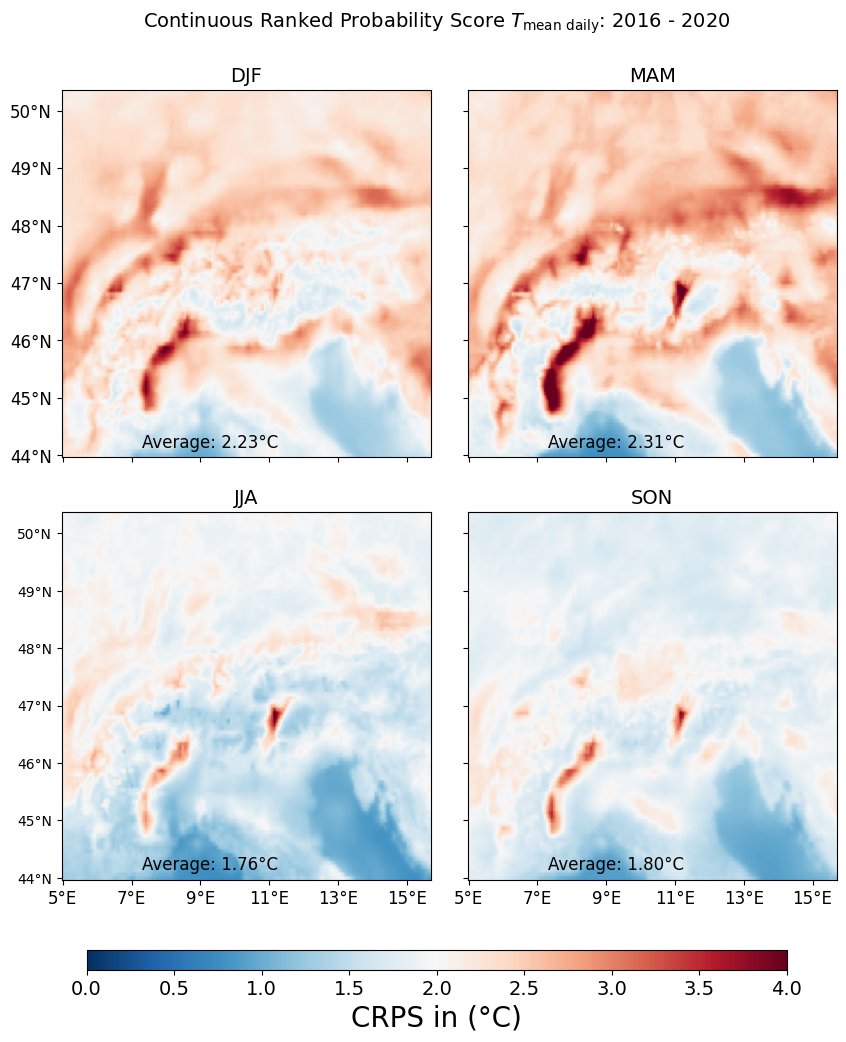

In [91]:
# plot seasonal differences
seasons = ('DJF', 'MAM', 'JJA', 'SON')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=True, sharey=True)
axes = axes.flatten()

start_year = 2016
end_year = 2020
# plot seasonal average bias
for ax, season in zip(axes, seasons):
    ds = bias_snl.sel(season=season)
    im = ax.imshow(ds.values, origin='lower', cmap='RdBu_r', vmin=0, vmax=4)
    ax.set_title(season, fontsize=14)
    ax.text(x=ds.shape[0] - 2, y=2, s='Average: {:.2f}°C'.format(ds.mean().item()), fontsize=12, ha='right')

# adjust axes
for ax in axes:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticks([])
    ax.axes.axis('tight')
    ax.set_xlabel('')
    ax.set_ylabel('')

# add latitude labels to left and right plots
lat_resolution = 15  # Specify the resolution in degrees
for ax in [axes[0], axes[-1]]:
    lat_values = coord.y.values
    lat_indices = [int(round(i)) for i in np.arange(0, len(lat_values), lat_resolution)]
    ax.set_yticks(lat_indices)
    ax.set_yticklabels(['{}°N'.format(int(round(lat_values[i]))) for i in lat_indices], fontsize=12)

# add longitude labels to all plots at the bottom
lon_resolution = 30  # Specify the resolution in degrees
for ax in axes:
    lon_values = coord.x.values
    lon_indices = [int(round(i)) for i in np.arange(0, len(lon_values), lon_resolution)]
    ax.set_xticks(lon_indices)
    ax.set_xticklabels(['{}°E'.format(int(round(lon_values[i]))) for i in lon_indices], fontsize=12)



# adjust figure
fig.suptitle('Continuous Ranked Probability Score {}: {} - {}'.format(str('$T_{\mathrm{mean \ daily}}$'), start_year, end_year), fontsize=14)
fig.subplots_adjust(hspace=0.15, wspace=0.1, top=0.9)

# add colorbar at the bottom
cbar_ax_predictand = fig.add_axes([0.15, 0.02, 0.7, 0.02])
cbar_predictand = fig.colorbar(im, cax=cbar_ax_predictand, orientation='horizontal')
cbar_predictand.set_label(label='CRPS in (°C)', fontsize=20)
cbar_predictand.ax.tick_params(labelsize=14)

# save figure
fig.savefig('/home/sdhinakaran/eurac/downScaleML/Notebooks/Thesis_Results/plots/{}_crps_seasonal_sf.png'.format(PREDICTAND), dpi=300, bbox_inches='tight')

plt.show()
